In [1]:
import os, shutil

## Create dirctory for the smaller datasets

In [2]:
original_dataset_dir = '/Users/Jingxiu Hu/Desktop/DeepLearningWithPython/dogs_vs_cats/kaggle_original_data'
base_dir = '/Users/Jingxiu Hu/Desktop/DeepLearningWithPython/dogs_vs_cats/cats_and_dogs_small'
#os.mkdir(base_dir)

## Creating the train, validation, and test dirctory for the smaller datasets

In [3]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

## Copy the images from the original datasets to the smaller datasets

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

## Check if we have 1000 cats and dogs images in train, 500 in validation and 500 in test. (2000 train images, 1000 validation images, 1000 test images in total)

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
from tensorflow.keras import optimizers

In [12]:
model.compile(loss='binary_crossentropy', optimizers=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Decode the images to tensors.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, 
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fit the model to train_generator

In [15]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 9s 89ms/step - loss: 0.7256 - acc: 0.5215 - val_loss: 0.7136 - val_acc: 0.5030
Epoch 2/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6926 - acc: 0.6020 - val_loss: 0.6444 - val_acc: 0.6300
Epoch 3/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6088 - acc: 0.6735 - val_loss: 0.6473 - val_acc: 0.6390
Epoch 4/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5729 - acc: 0.7010 - val_loss: 0.6028 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5261 - acc: 0.7370 - val_loss: 0.6108 - val_acc: 0.7120
Epoch 6/30
100/100 [==============================] - 8s 76ms/step - loss: 0.4952 - acc: 0.7580 - val_loss: 0.5456 - val_acc: 0.7390
Epoch 7/30
100/100 [==============================] - 8s 75ms/step - loss: 0.4366 - acc: 0.7935 - val_loss: 0.8365 - val_acc: 0.6580
Epoch 8/30
100/100 [==============================] - 8s 77ms/step - 

In [16]:
model.save('cats_and_dogs_small_1.h5')

## Plot loss and accuarcy of the model over training and validation set.

In [12]:
import matplotlib.pyplot as plt

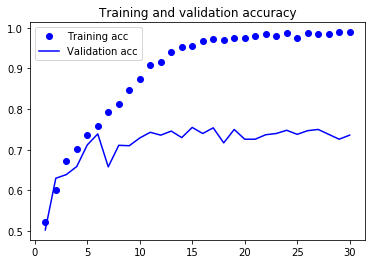

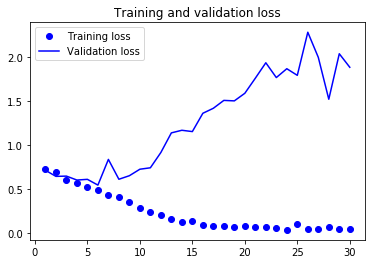

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Obviously, our model is overfitting to the train data set. We will use data augmentation to reduce overfitting.

In [9]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [10]:
from tensorflow.keras.preprocessing import image

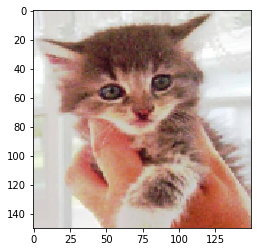

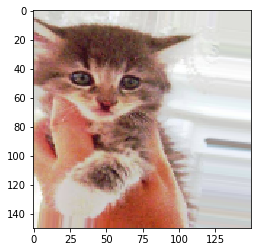

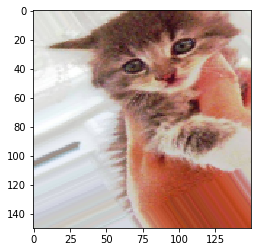

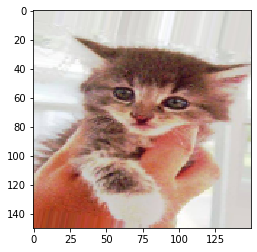

In [13]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x= image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    implot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Create new mode that include drop out to reduce overfit, and train it with data augmentation generators.

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, 
                                                            class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, 
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 21s 208ms/step - loss: 0.6938 - acc: 0.5207 - val_loss: 0.6767 - val_acc: 0.5654
Epoch 2/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6796 - acc: 0.5631 - val_loss: 0.6561 - val_acc: 0.5933
Epoch 3/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6709 - acc: 0.5773 - val_loss: 0.6648 - val_acc: 0.5565
Epoch 4/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6563 - acc: 0.5958 - val_loss: 0.6259 - val_acc: 0.6383
Epoch 5/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6426 - acc: 0.6181 - val_loss: 0.6107 - val_acc: 0.6428
Epoch 6/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6256 - acc: 0.6392 - val_loss: 0.5786 - val_acc: 0.6891
Epoch 7/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6103 - acc: 0.6665 -

In [34]:
model.save('cats_and_dogs_small_2.h5')

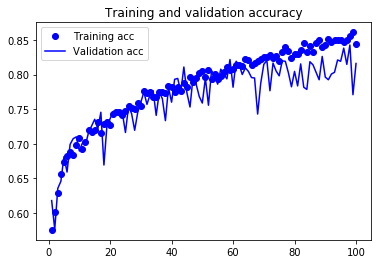

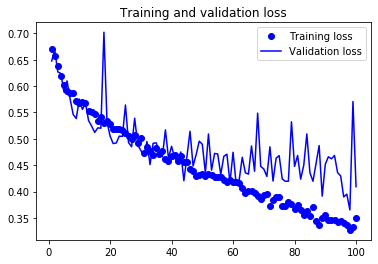

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Let's check the accuarcy we got on test data.

In [16]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=32, class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8071066
